In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [ ]:
def plot_horizontal_bar(b_l, ls, y_ls, f_size):
    plt.figure(figsize=f_size)
    plt.barh(y = range(10), width=b_l, tick_label=y_ls, alpha=0.3)
    for i in range(10):
        if b_l[i] < 0:
            plt.text(0.2, i, ls[i])
        else:
            plt.text(b_l[i] +0.2, i, ls[i])
    plt.show()

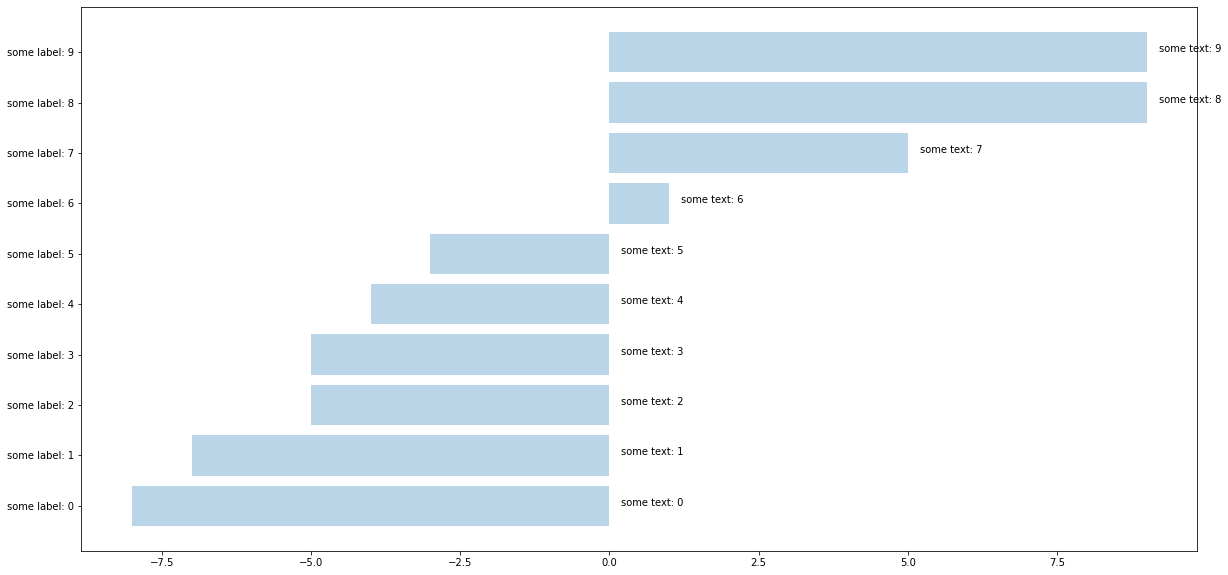

In [ ]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [ ]:
import pandas as pd
from matplotlib import cm

In [ ]:
def plot_time_probabilities(prob_in_time, f_size):
    X = prob_in_time.copy()#/prob_in_time.max()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_figwidth(f_size[0])
    fig.set_figheight(f_size[1])
    cmap = plt.cm.coolwarm(np.linspace(0, 1, len(X.columns)))
    for i in range(len(X.columns)):
        ax.fill_between(X.index, X.loc[:,0:i-1].sum(axis=1), X.loc[:, 0:i].sum(axis=1), color = cmap[i], alpha=0.3)
    plt.show()

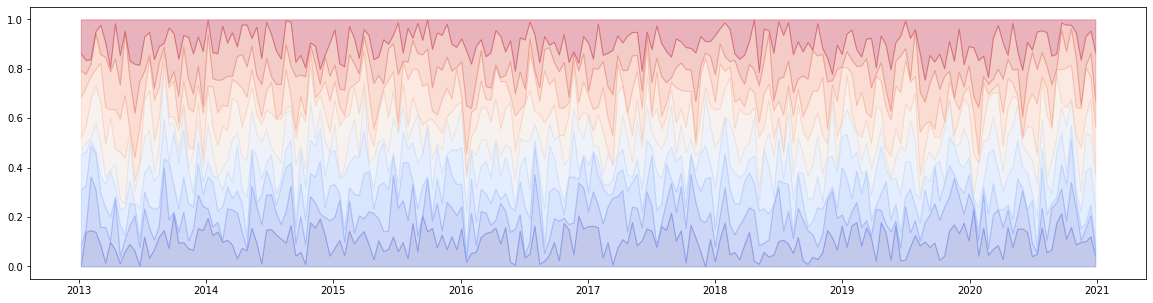

In [ ]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [ ]:
def plot_intraday_ts(ts, f_size):
    ts = ts[:len(ts)//24*24]
    my_ts = np.array(ts.values).reshape(-1, 24)
    ts = pd.DataFrame(my_ts, index=np.unique(ts.index.date), columns=np.unique(ts.index.time))
    ts = ts.T
    ts = ts.fillna(ts.mean().mean())
    fig, ax = plt.subplots()
    fig.set_figwidth(f_size[0])
    fig.set_figheight(f_size[1])
    ts_plt = ax.pcolormesh(ts, edgecolors = 'white', cmap = 'coolwarm', alpha = 0.8)
    plt.ylabel('Время', fontsize=10)
    plt.xlabel('Дата', fontsize=10)
    
    ax.set_xticks(range(0, len(ts.columns), 3))
    ax.set_xticklabels([ts.columns[i] for i in range(0, len(ts.columns), 3)], rotation=60, fontsize=8)
    ax.set_yticks(range(0,len(ts.index), 2))
    ax.set_yticklabels([ts.index[i] for i in range(0, len(ts.index), 2)], fontsize = 8)
    plot_ts = plt.colorbar(ts_plt)
    plt.show()
    return

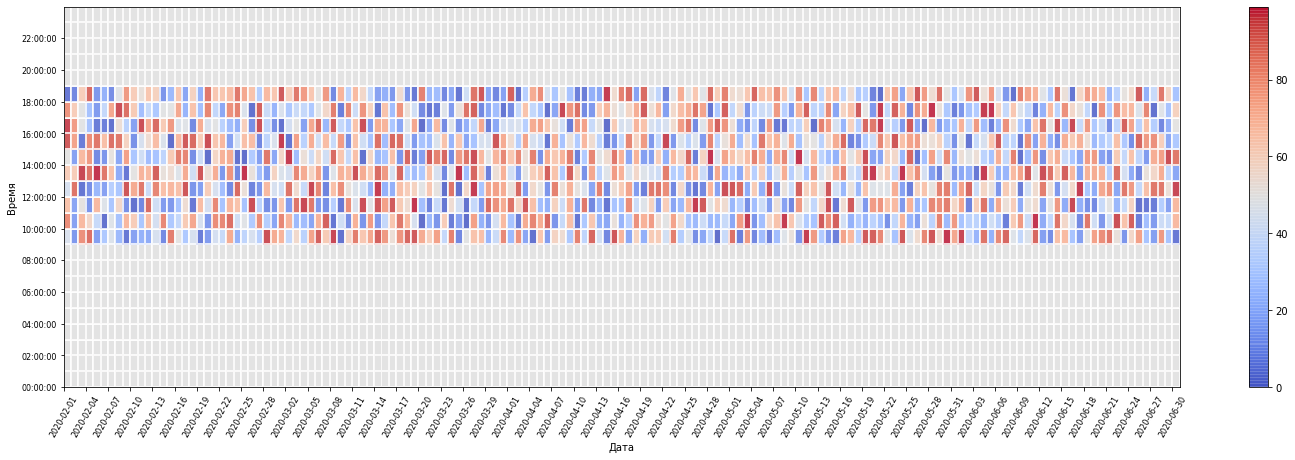

In [ ]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)